In [5]:
import numpy as np 
import sklearn.svm
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

In [6]:
os.chdir('/Users/farah/Documents/INFO/Cours_ET4/MachineLearning/ProjetIA')
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', header=0)
heart.head()


y = heart.iloc[:,12]
X = heart.iloc[:,:12]
reste2 = heart.iloc[:,12:]

#heart.size
#reste2.shape, X.shape

digits = heart.load_digits()

AttributeError: 'DataFrame' object has no attribute 'load_digits'

In [75]:
z

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [3]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [22]:
heart.columns
features = heart[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

reste = heart[['DEATH_EVENT']]

reste.shape, features.shape

A = np.asarray(features)

B = np.asarray(reste)

res = heart['DEATH_EVENT'].values

reste3 = np.where(B==1, 0, 1)

A.shape, B.shape
#reste.size , res.size

((299, 12), (299, 1))

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


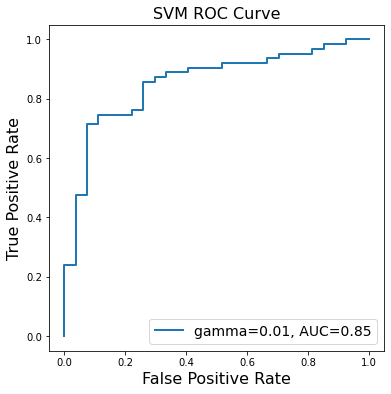

In [23]:
X.size, A.shape, B.shape

from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(A, reste3, test_size=0.3)

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)

# Entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train_std, y_train)

y_test_pred = classifier.decision_function(X_test_std)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state = 4)

In [25]:
X_train.shape

(239, 12)

In [27]:
from sklearn import svm
#X_test.shape

classifier = svm.SVC(kernel='linear', gamma = 'auto', C=2)
classifier.fit(X_train, Y_train)

y_predict = classifier.predict(X_test)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predict))

In [ ]:
def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    Nbins = 300
    dx = max((x_max- x_min)/Nbins, (y_max- y_min)/Nbins) #  0.002 <--> Nbins=500 ## grid mesh size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                         np.arange(y_min, y_max, dx))

    ## prediction value by zone
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ## crée une nouvelle figure (avec le numero suivant de la figure de numeor le plus grand)
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    ## plot du fond avec une couleur selon la valeur de Z(x,y)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ## plot des points de données ##
    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    ## plot des vecteurs supports ##
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='+')

    plt.title('(training) "score" : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim([0,1])
    plt.ylim([0,1])
    
    ##########################################################
## data set 1 ##
print("Cas du carré de points linéairement séparable.\n")

In [ ]:
#def make_separable_square(Nset, seed):
 #   np.random.seed(seed)
  #  X2 = X
    #y = (X[:,0] > 0.5)
   # return X,y


In [ ]:
#N = 100
#D = 2
#seed = 42
#X, y       = make_separable_square(N, seed)
#Xval, yval = X[80:N] , y[80:N] ## TODO : générer un validation set adéquat.
#X, y       = X[0:80] , y[0:80]  #slices

In [ ]:
#X, y       = make_separable_square(N, seed)
#Xval, yval = X[80:N] , y[80:N] ## TODO : générer un validation set adéquat.
#X, y       = X[0:80] , y[0:80]  #slices

In [11]:
clf = sklearn.svm.SVC(kernel='linear', C=1, degree=12) ## TODO: lire la doc, pour comprendre quels arguments choisir !

In [12]:
clf.C

1

In [ ]:
#features = heart[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
#       'ejection_fraction', 'high_blood_pressure', 'platelets',
#       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

#reste = heart[['DEATH_EVENT']]

#reste.shape, features.shape

#A = np.asarray(features)

#B = np.asarray(reste)

#A, B

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state = 4)

#clf.fit(X_train,X_test)

In [ ]:
#clf.coef_, clf.coef0

In [ ]:
#clf.class_weight_

In [1]:
import numpy as np 
import sklearn.svm
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', header=0)
heart.head()

features = heart[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

reste = heart[['DEATH_EVENT']]

reste.shape, features.shape

A = np.asarray(features)

B = np.asarray(reste)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.8, random_state = 4)


In [ ]:
## on prend 80% pour le train+validation set, 20% pour le test (tout a la fin !)
x_train, x_test, y_train, y_test = train_test_split(x_onehot.toarray(), y, test_size=0.2, random_state = 101)

## on prend 20% du 80% pour le validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state = 101)

In [2]:
clf = sklearn.svm.SVC(kernel='linear', C=1) ## TODO: lire la doc, pour comprendre quels arguments choisir !



In [3]:
## TODO entrainer le modele (1 ligne)
clf.fit(X_train,Y_train)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, kernel='linear')

In [6]:
y_pred = clf.predict(X_test)
Y_test*1.0 - y_pred*1.0

array([[ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.]])

In [8]:
print("training score:",clf.score(X_train,Y_train))
print("test score:",clf.score(X_test,Y_test))

training score: 0.7457627118644068
validation score: 0.7375


In [9]:

#plot_boundary(clf,A,B)


NameError: name 'plot_boundary' is not defined

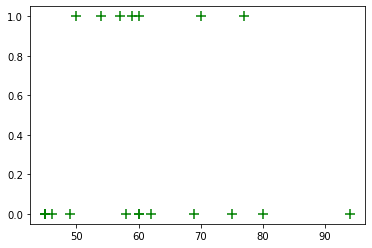

In [10]:
suppVect = clf.support_vectors_ ## TODO : recuperer les vecteurs supports, en utilisant l'objet "clf"
size=100
plt.scatter(suppVect[:,0],suppVect[:,1], c = 'green', s = size, marker='+')
## TODO: tracer aussi les points de l'ensemble de validation (en plus petits, ou autres couleur, etc)

In [24]:
#suppVect.shape
print("Cest : ", suppVect[1,0])
print("Cest 2 : ", X_test[1,0])


Cest :  80.0
Cest 2 :  55.0


In [25]:
clf.n_support_

array([ 9, 11], dtype=int32)

In [26]:
clf.coef_

array([[ 8.61040285e-02,  1.21261088e-01,  3.99758927e+00,
        -2.37165350e+00, -5.50757467e+01, -7.22459793e-01,
        -5.21413338e-02,  1.11349979e+01,  1.16201692e+01,
        -2.00000000e+00, -8.78738912e-01, -5.88996332e+01]])

In [1]:
    plt.figure(figsize=(16,8))
    #plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    f.countplot(x = 'serum_creatinine',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.show()
    

NameError: name 'plt' is not defined

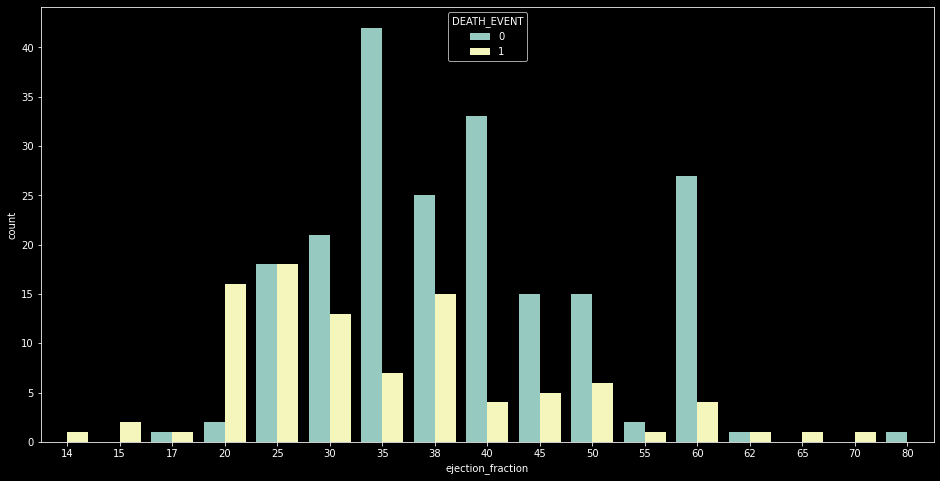

In [47]:
    plt.figure(figsize=(16,8))
    #plt.style.use(['seaborn-bright','dark_background'])
    #sns.countplot(x = heart[i],data = data, hue = 'class', palette='hsv')
    # count plot on single categorical variable
    sns.countplot(x = 'ejection_fraction',hue ='DEATH_EVENT', data = heart)
    #plt.style.use(['seaborn-bright','dark_background'])
    # Show the plot
    plt.show()

In [14]:
df_pos = heart[heart.DEATH_EVENT==1]
df_neg = heart[heart.DEATH_EVENT==0]

features_pos = df_pos[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

reste_pos = df_pos[['DEATH_EVENT']]

x_pos = np.asarray(features_pos)

Y_pos = np.asarray(reste_pos)

In [16]:
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, Y_train_pos, Y_test_pos = train_test_split(x_pos, Y_pos, test_size=0.2, random_state = 4)

In [19]:
X_train_pos.shape, Y_train_pos.shape

((76, 12), (76, 1))

In [21]:
from sklearn import svm

clf_pos = svm.SVC(kernel='linear', gamma = 'auto', C=1)
clf_pos.fit(X_train_pos, Y_train_pos)

y_predict_pos = clf.predict(X_test_pos)

/Users/farah/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: The number of classes has to be greater than one; got 1 class